In [4]:
import ollama 
import os
from tqdm import tqdm
import signal

In [5]:
images_path = '/home1/pupil/goowfd/CVPR_2025/hateful_memes/img/'
root_path = '/home1/pupil/goowfd/CVPR_2025/hateful_memes/img/'

list_of_image_names = os.listdir(images_path)

In [6]:
def check_yes_no(text):
    # Strip any leading/trailing whitespace and convert to lowercase
    text = text.strip().lower()

    # Check if the text starts with 'yes' or 'no'
    if text.startswith("yes"):
        return 1
    elif text.startswith("no"):
        return 0
    else:
        return None  
    
class TimeoutException(Exception):
    pass

def timeout_handler(signum, frame):
    raise TimeoutException


In [7]:
list_of_models = ['llava:7b', 
                  'llava:13b',
                  'llava:34b',
                  'llava-llama3',
                  'bakllava',
                  'moondream',
                  'minicpm-v',
                  'llava-phi3']

ollama.pull('llava:7b') #pull the desired model

{'status': 'success'}

In [8]:


options= {  # new
            "seed": 123,
            "temperature": 0,
            "num_ctx": 2048, # must be set, otherwise slightly random output
        }
    
llava_7b_labels = {}

for image_name in tqdm(list_of_image_names):
    
    image_path = os.path.join(root_path, image_name)
    
    prompt = "Is this an offensive meme? Please answer with YES or NO. DO NOT mention the reason: "
#     prompt = "Is there ? Please answer with YES or NO. DO NOT mention the reason: "
#     prompt = "Is this somehow an offensive meme? Please answer with YES or NO: "
#     prompt = "describe this image: "
    
    response = ollama.generate(model='llava:7b', prompt=prompt, images=[image_path], options=options)
    
#     response = ollama.chat(model='llava:34b', messages=[
#       {
#         'role': 'user',
#         'content': prompt,
#       }, 
#     ], options= {  # new
#             "seed": 123,
#             "temperature": 0,
#             "num_ctx": 2048, # must be set, otherwise slightly random output
#         })
    # print(response)
#     print(prompt)
#     print("------------------------------------------------------")
#     print(image_name)
    
    label = check_yes_no(response['response'])
    
#     print(label)
    
    llava_7b_labels[image_name] = label
    
#     break


  0%|                                                                                                       | 10/10000 [00:07<2:01:42,  1.37it/s]


KeyboardInterrupt: 

In [9]:
llava_7b_labels

{'48132.png': 0,
 '01527.png': 0,
 '47196.png': 1,
 '79312.png': 1,
 '50738.png': 1,
 '86593.png': 0,
 '51473.png': 1,
 '93614.png': 0,
 '50723.png': 1,
 '14829.png': 1}

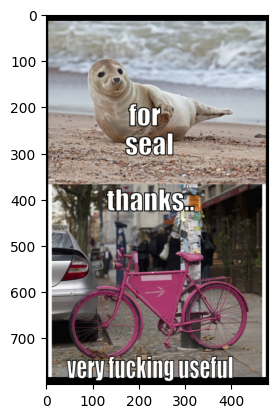

In [26]:
import matplotlib.pyplot as plt
import PIL 

text_image_path = os.path.join(root_path, '79312.png')
timeout_duration = 10

# signal.signal(signal.SIGALRM, timeout_handler)
# signal.alarm(timeout_duration)  # Set the timeout
# try:
# #     result = ollama.generate(prompt)
#     response = ollama.generate(model='llava:7b', prompt=prompt, images=[text_image_path], options=options)
#     print(response['response'])
# except TimeoutException:
#     print(f"Prompt took longer than {timeout_duration} seconds. Moving to the next one.")
#     response = "Nothing"
# finally:
#     signal.alarm(0)  # Disable the alarm


# response = ollama.generate(model='llava:7b', prompt=prompt, images=[text_image_path], options=options)

image = PIL.Image.open(text_image_path)
plt.imshow(image)

In [33]:
results_file_name = 'llava_test' + '_test.json'
import json
with open(results_file_name, 'w') as fp:
    json.dump(llava_7b_labels, fp)

In [37]:
list_of_image_names[2457]

'97132.png'

In [45]:
response

{'model': 'llava:7b',
 'created_at': '2024-10-16T14:32:51.853194182Z',
 'response': " No, this is not an offensive meme. It appears to be a promotional image for a person or brand, with text that seems to be in Hindi and English, possibly indicating the name of the individual or the company they represent. The image itself does not contain any offensive content; it's a straightforward advertisement or promotional material. ",
 'done': True,
 'done_reason': 'stop',
 'context': [733,
  16289,
  28793,
  733,
  5422,
  28733,
  28734,
  28793,
  13,
  13,
  2301,
  456,
  396,
  17381,
  1626,
  28706,
  28804,
  5919,
  4372,
  395,
  627,
  2255,
  442,
  7929,
  28723,
  9317,
  5457,
  4389,
  272,
  2611,
  28747,
  28705,
  733,
  28748,
  16289,
  28793,
  1770,
  28725,
  456,
  349,
  459,
  396,
  17381,
  1626,
  28706,
  28723,
  661,
  8045,
  298,
  347,
  264,
  18022,
  1479,
  3469,
  354,
  264,
  1338,
  442,
  5804,
  28725,
  395,
  2245,
  369,
  3969,
  298,
  347,


In [66]:
import json

# Load the JSON data from the file
with open('/home1/pupil/goowfd/CVPR_2025/hateful_memes/simplified_dev.json', 'r') as file:
    data = json.load(file)

image_names = []
for entry in data:
    img_name, ext = entry['img'].split('.')
    padded_img_name = img_name.zfill(5)  # Pad the image name to 5 digits
    image_names.append(f"{padded_img_name}.{ext}")
print(image_names)


['08291.png', '46971.png', '03745.png', '83745.png', '80243.png', '05279.png', '01796.png', '53046.png', '82301.png', '31752.png', '27635.png', '80597.png', '45368.png', '17963.png', '53968.png', '10749.png', '25149.png', '87520.png', '89071.png', '09563.png', '72048.png', '49826.png', '26453.png', '12650.png', '02568.png', '83954.png', '24316.png', '62035.png', '65342.png', '92058.png', '58672.png', '54069.png', '91586.png', '87130.png', '95640.png', '47819.png', '59140.png', '13647.png', '65832.png', '57621.png', '40982.png', '43275.png', '12973.png', '74350.png', '02478.png', '51607.png', '65403.png', '29750.png', '26547.png', '02143.png', '68192.png', '52603.png', '05349.png', '06491.png', '74013.png', '27485.png', '13026.png', '17265.png', '91405.png', '14026.png', '18945.png', '83920.png', '83497.png', '04569.png', '39607.png', '09715.png', '01925.png', '94813.png', '29437.png', '95038.png', '64891.png', '63280.png', '17682.png', '84510.png', '28690.png', '03567.png', '95830.png'

In [65]:
print(image_names[0].zfill(5))

8291.png


In [59]:
print(image_path)
PIL.Image.open(image_path)

/home1/pupil/goowfd/CVPR_2025/hateful_memes/img/8291.png


FileNotFoundError: [Errno 2] No such file or directory: '/home1/pupil/goowfd/CVPR_2025/hateful_memes/img/8291.png'